## Regression example using the supercondactivty dataset

The dataset can also be found here:

https://archive.ics.uci.edu/dataset/464/superconductivty+data

In [1]:
#pip install --upgrade pip
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [3]:
import pandas as pd
df = pd.read_csv('train.csv')

In [4]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
Y = df['critical_temp']
X = df[[col for col in df.columns if col!="critical_temp"]]

In [6]:
X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


In [7]:
Y

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
#test_size is the percentage of the test size to the complete dataset
# random_state is the seed. A specific pseudorandom number to split the data set
# in order to produce same splitting every time we run the script.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [9]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
#name StandardScaler()
scaler = StandardScaler()
#call it for the data (the result is array)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [10]:
X_train

array([[-0.78261915, -0.4851066 ,  0.24499114, ...,  1.07774111,
        -0.76016632, -1.00113286],
       [-1.4767475 , -0.15805024,  1.37938081, ...,  0.46217686,
        -1.73283163, -1.47903193],
       [-0.08849081, -0.63025016,  0.8985524 , ...,  0.83574647,
         2.52084185,  1.95087741],
       ...,
       [-0.08849081, -0.37830898, -0.63236019, ..., -0.66427993,
        -0.83938149, -0.89056724],
       [ 0.60563754, -0.14784024, -0.43408273, ..., -0.53465582,
         0.74317002,  0.73888074],
       [ 0.60563754, -0.6248123 ,  0.15393653, ..., -0.78172473,
        -0.90749775, -0.91431213]])

In [11]:
from tensorflow.keras.layers import Dense, Input
model = tf.keras.Sequential([
    Input(shape=(81,)),  # Explicitly specify input shape using Input layer
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation=None)
])

In [12]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
model.fit(X_train, Y_train, epochs = 100,batch_size=100)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1559.4760
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 358.2068
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 300.9573
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 279.9185
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 259.6877
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 250.8520
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 244.0844
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 239.1751
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 232.3437
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 220.4139
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 211.7440
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 206.2967
Epoch 13/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 201.3907
Epoch 14/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 208.1876
Epoch 15/100
1

## Plotting true versus predicted values of the critical temperature

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


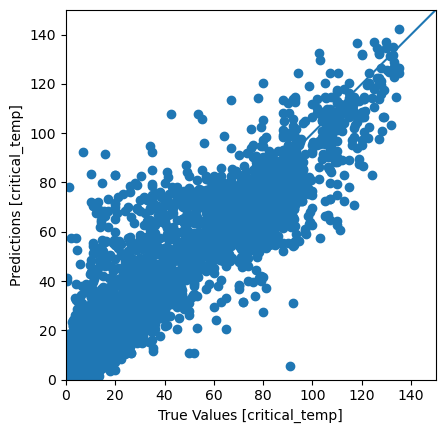

In [14]:
y_pred = model.predict(X_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(Y_test, y_pred)
plt.xlabel('True Values [critical_temp]')
plt.ylabel('Predictions [critical_temp]')
lims = [0, 150]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [15]:
MSE =mean_squared_error(Y_test,y_pred)

In [16]:
MSE

148.81986070652354

### Error (histogram)

Text(0, 0.5, 'Count')

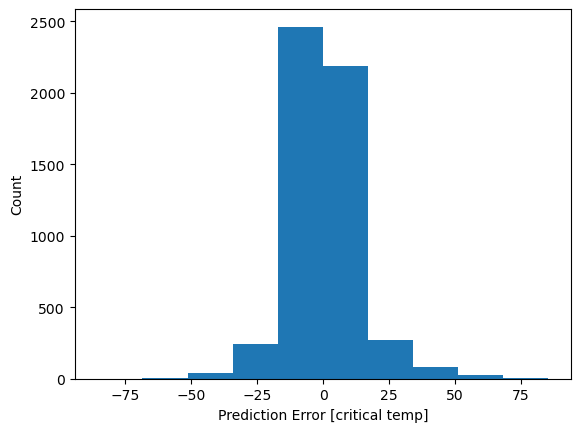

In [17]:
error = y_pred - Y_test
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [critical temp]')
plt.ylabel('Count')

In [18]:
# Evaluate the model on test data
loss = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}')

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 139.4487
Test loss: 148.81985473632812
